In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

In [2]:
data = pd.read_csv("../../clustering.csv", header = None)
data

,0,1
0,41.788907,52.220182
1,-96.586516,90.957033
2,-54.143591,-99.153377
3,19.929231,-45.859779
4,-82.941076,84.099186
...,...,...
395,22.423142,50.252807
396,-58.534367,-78.679387
397,36.446549,-11.841887
398,-101.284845,85.096034


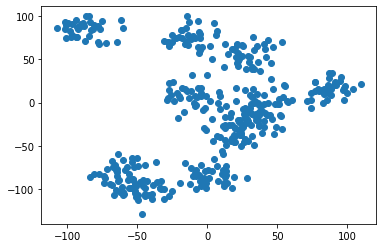

In [3]:
plt.scatter(data[0], data[1])
plt.show()

Na początku przyjrzyjmy się ludzkim okiem ile klastrów powinniśmy dostać. Wg mnie byłoby to 10 skupień, jednakże w zależności od tego jak bradzo chcemy je rozdzielać, dobrym wyborem mogłany być każda z wartości od 3 do 10. Sprawdźmy jak poradzą sobie algorytmy AgglomerativeClustering oraz kMeans clustering.

Poniżej klasteryzadja przy użyciu AgglomerativeClustering z 3-10 klastrami.

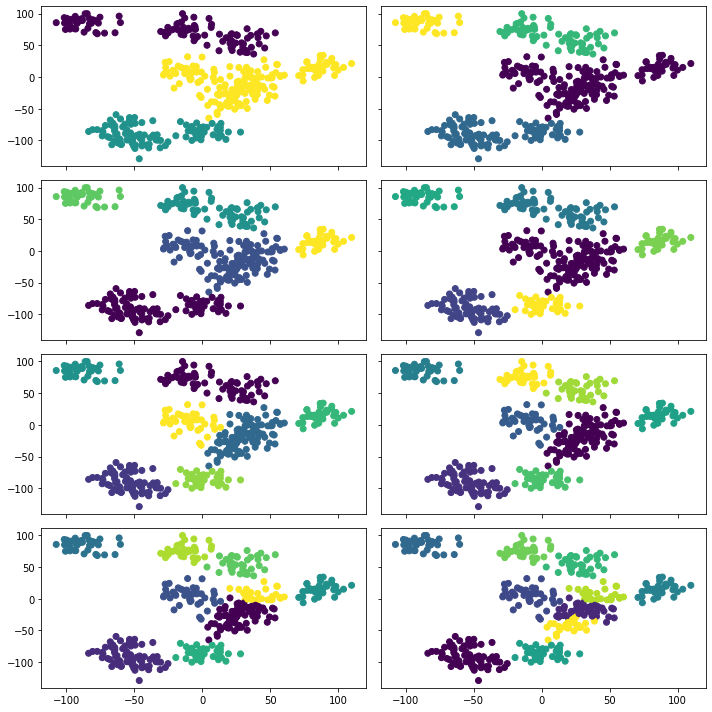

In [4]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 10), sharex='all', sharey='all')
axes[0,0].scatter(data[0], data[1], c=AgglomerativeClustering(n_clusters = 3).fit(data).labels_)
axes[0,1].scatter(data[0], data[1], c=AgglomerativeClustering(n_clusters = 4).fit(data).labels_)
axes[1,0].scatter(data[0], data[1], c=AgglomerativeClustering(n_clusters = 5).fit(data).labels_)
axes[1,1].scatter(data[0], data[1], c=AgglomerativeClustering(n_clusters = 6).fit(data).labels_)
axes[2,0].scatter(data[0], data[1], c=AgglomerativeClustering(n_clusters = 7).fit(data).labels_)
axes[2,1].scatter(data[0], data[1], c=AgglomerativeClustering(n_clusters = 8).fit(data).labels_)
axes[3,0].scatter(data[0], data[1], c=AgglomerativeClustering(n_clusters = 9).fit(data).labels_)
axes[3,1].scatter(data[0], data[1], c=AgglomerativeClustering(n_clusters = 10).fit(data).labels_)
fig.tight_layout()

Jak widać algorytm AgglomerativeClustering poradził sobie dobrze. Zobaczmy jak poradzi sobie KMeans.

In [5]:
from sklearn.cluster import KMeans

def plotKMeans(df, n):
    kmeans = KMeans(n_clusters = n, random_state = 123)
    kmeans.fit(df)
    y_means = kmeans.predict(df)
    plt.scatter(data[0], data[1], c = y_means)
    plt.show()

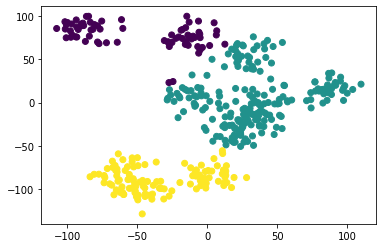

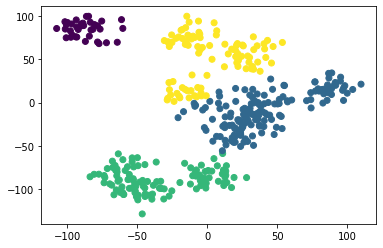

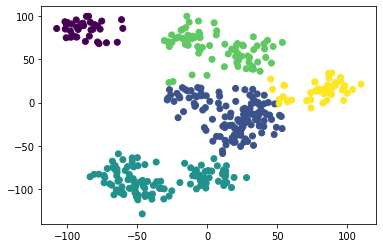

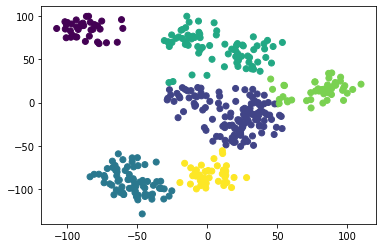

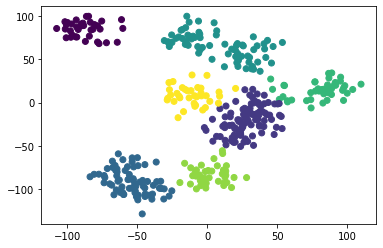

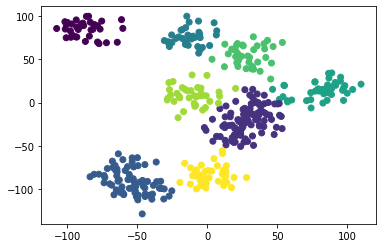

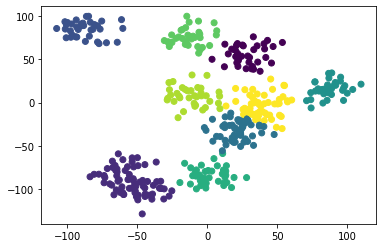

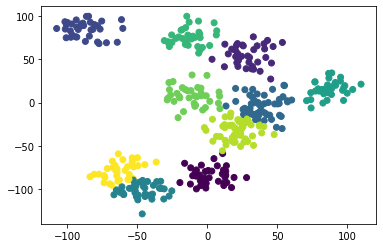

In [6]:
for i in range (3,11):
    plotKMeans(data, i)

Wg mojej subiektywnej oceny, KMeans tworzy lepszy podział niż Agglomerative clustreing. Ponadto, dla 10 klastrów dostajemy:

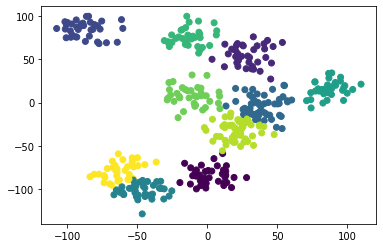

In [7]:
plotKMeans(data, 10)

Podział ten pokrywa się z moim subiektywnym podziałem stworzonym po zobaczeniu zbioru po raz pierwszy. Jednakże, aby porównywać wyniki klasteryzacji bardziej obiektywnie użyję współczynnika Silhouette.

In [8]:
from sklearn.metrics import silhouette_score

Dla AgglomerativeClustering z 10 klastrami:

In [9]:
silhouette_score(data, AgglomerativeClustering(n_clusters = 10).fit(data).labels_)

0.5221491193875683

Dla KMeans z 10 klastrami:

In [10]:
kmeans = KMeans(n_clusters = 10, random_state = 123)
kmeans.fit(data)
y_means = kmeans.predict(data)
silhouette_score(data, y_means)

0.5271272042247411

Bardzo podobne rezultaty, odrobinę lepszy jest wynik dla KMeans, jest to jednak dosyć nieznaczna różnica. Sprawdźmy teraz jak w przypadku innej liczby klastrów:

In [11]:
aglo_res = []
km_res = []
for i in range(3,11):
    aglo_res.append(silhouette_score(data, AgglomerativeClustering(n_clusters = i).fit(data).labels_))
    kmeans = KMeans(n_clusters = i, random_state = 123)
    kmeans.fit(data)
    y_means = kmeans.predict(data)
    km_res.append(silhouette_score(data, y_means))

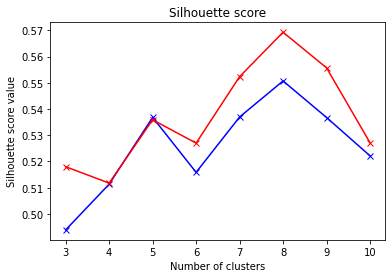

In [12]:
plt.plot(range(3,11), aglo_res, 'bx-')
plt.plot(range(3,11), km_res, 'rx-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score value')
plt.title('Silhouette score')
plt.show()

Jak widać, KMeans, oznaczony kolorem czerwonym, ma lepsze wyniki od AgglomerativeClustering (kolor niebieski).

Na koniec, aby sprawdzić jakie liczby klastrów byłyby dobrym wyborem (poza subiektywnie wybraną dziesiątką), zastosujemy metodę łokcia: 

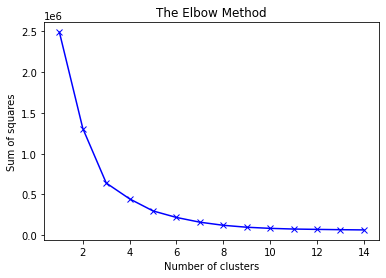

In [13]:
A = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, random_state=123)
    kmeans.fit(data)
    score = (-1)*kmeans.score(data)
    A.append(score)
plt.plot(range(1,15), A, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squares')
plt.title('The Elbow Method')
plt.show()

Największe załamania pojawiają się dla liczby klastrów równej 3 i 5, jednakże dopiero po 10-11, wykres robi się bardzo płaski. 